In [18]:
#importing all the libraries we need
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report


In [8]:
#Adding in our datafile
survival_df = pd.read_csv("../Resources/cleaned_data_survival_prediction.csv")
survival_df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
3,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0
4,46.0,25.845717,0,Hispanic,M,167.6,Accident & Emergency,92,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [9]:
#labeling our X variable to drop our target variable
#setting our y variable to be our target variable
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [10]:
#dummy-coding the rest of our X categorical variables
X = pd.get_dummies(X)

### Balance the data set - OVERsampling

#### Since our data was not evenly distributed, we decided to use a method called OVERsampling to help compensate.

In [11]:
#Balance Data - oversampling
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [12]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=45)

In [13]:
#Running Logistic Regression
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7767658135423872
Testing Data Score: 0.776688955499193


/Users/atikahemani/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Testing our model
y_true = y_test
y_pred = classifier.predict(X_test)

print('Test Acc: %.3f' % classifier.score(X_test, y_test))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

Test Acc: 0.777
[[10398  2685]
 [ 3126  9813]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     13083
           1       0.79      0.76      0.77     12939

    accuracy                           0.78     26022
   macro avg       0.78      0.78      0.78     26022
weighted avg       0.78      0.78      0.78     26022



### Since there is a large amount of features, we want to see which features are the most important. Below we are running feature importance. 

In [16]:
importance = classifier.coef_[0]

Feature: 0, Score: 0.03113
Feature: 1, Score: 0.03465
Feature: 2, Score: -0.18213
Feature: 3, Score: 0.01794
Feature: 4, Score: -0.00007
Feature: 5, Score: 0.05579
Feature: 6, Score: -0.01538
Feature: 7, Score: 0.00039
Feature: 8, Score: -0.00065
Feature: 9, Score: -0.07497
Feature: 10, Score: 0.09113
Feature: 11, Score: -0.15872
Feature: 12, Score: -0.15858
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.04143
Feature: 15, Score: 0.00028
Feature: 16, Score: 0.29374
Feature: 17, Score: 0.00167
Feature: 18, Score: 0.00987
Feature: 19, Score: -0.07137
Feature: 20, Score: 0.58163
Feature: 21, Score: 0.00905
Feature: 22, Score: -0.00565
Feature: 23, Score: -0.01070
Feature: 24, Score: -0.00279
Feature: 25, Score: 0.01277
Feature: 26, Score: 0.00578
Feature: 27, Score: 0.00002
Feature: 28, Score: -0.04536
Feature: 29, Score: 0.00316
Feature: 30, Score: 0.03932
Feature: 31, Score: 0.00311
Feature: 32, Score: 0.00517
Feature: 33, Score: 0.02777
Feature: 34, Score: -0.02488
Feature: 35, Sco

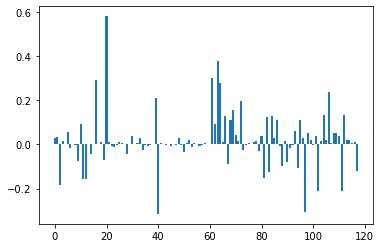

In [19]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()